# Produce the various exclusion plots

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [5]:
hierarchy = 'heavy'
D_or_M = 'majorana'

save_folder = f'../fig/6_limit_visualisation/{hierarchy}_{D_or_M}/'
!mkdir -p $save_folder

set_plot_style()

In [6]:
# my_exp_analyses = load_datasets(hierarchies=['heavy', 'light'],
#                                   D_or_Ms=D_or_M,
#                                   fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [7]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

heavy majorana FHC
Wall time: 11.316524028778076 s, CPU time: 1.4600283540000003
heavy majorana RHC
Wall time: 11.302721738815308 s, CPU time: 1.500350847


In [8]:
analysis_names = ['tpc_argon_only', 'tpc_pod_only', 'tpc', 'tpc_projection1', 'tpc_projection2']

# $m_{Z^\prime} - \varepsilon$

In [9]:
case_vars = ['mz', 'epsilon']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

In [14]:
likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])

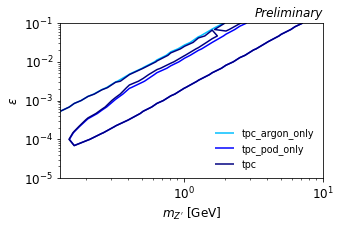

In [19]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_argon_only', 'tpc_pod_only', 'tpc'],
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

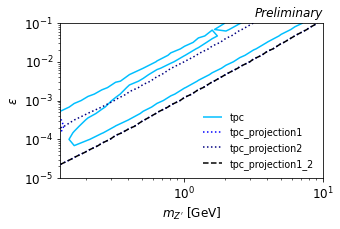

In [20]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

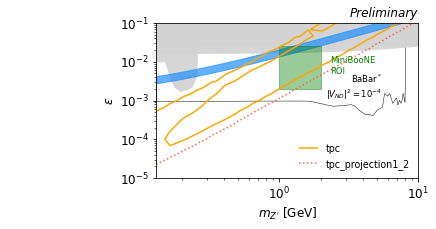

In [21]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
mz_epsilon_heavy_plot(ax, retrieved['FHC']['pars']['m4'], retrieved['FHC']['pars']['mz'])
ax.set_ylim(1e-5, 1e-1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1_2'],
                   save_name='tpc_final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower right',
                   colors=['orange', 'tomato'],
                   linestyles=['-', ':'])

# Heavy $m_N - |U_{\mu N}|^2$

In [24]:
case_vars = ['m4', 'Umu4_2']
retrieved = retrieve_full_analysis(case_vars, hierarchy)
likes, mus, sigma2s = compute_likes(retrieved, 
                                    my_exp_analyses, 
                                    hierarchy,
                                    D_or_M,
                                    analysis_names)

tpc_argon_only FHC
tpc_argon_only RHC
tpc_pod_only FHC
tpc_pod_only RHC
tpc FHC
tpc RHC
tpc_projection1 FHC
tpc_projection1 RHC
tpc_projection2 FHC
tpc_projection2 RHC


In [25]:
likes['tpc_projection1_2'] = combine_likes([likes['tpc_projection1'], likes['tpc_projection2']])

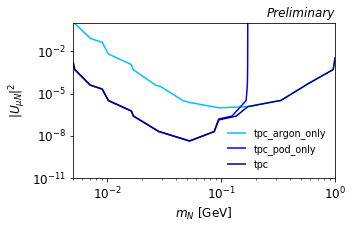

In [27]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc_argon_only', 'tpc_pod_only', 'tpc'],
                   save_name='tpc_argon_vs_pod',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='lower right',
                   colors=['deepskyblue', 'blue', 'navy'],
                   linestyles=['-', '-', '-'])

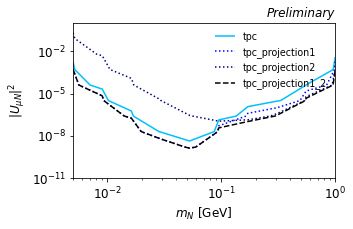

In [28]:
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1', 'tpc_projection2', 'tpc_projection1_2'],
                   save_name='tpc_projections',
                   save_folder=save_folder,
                   ax=None,
                   legend_loc='upper right',
                   colors=['deepskyblue', 'blue', 'navy', 'black'],
                   linestyles=['-', ':', ':', '--'])

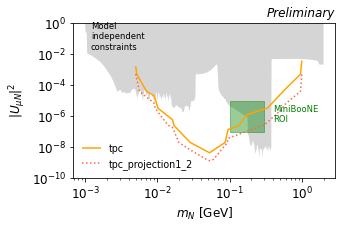

In [29]:
ax = set_canvas(f'{case_vars[0]}_{case_vars[1]}')
m4_Umu4_2_heavy_plot(ax, np.geomspace(1e-3, 2, 1000))
ax.set_ylim(1e-10, 1)
basic_contour_plot(case_vars,
                   retrieved, 
                   likes,
                   ['tpc', 'tpc_projection1_2'],
                   save_name='tpc_final',
                   save_folder=save_folder,
                   ax=ax,
                   legend_loc='lower left',
                   colors=['orange', 'tomato'],
                   linestyles=['-', ':'])